<a href="https://colab.research.google.com/github/Giocatory/ml_ai_learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
(60000,)


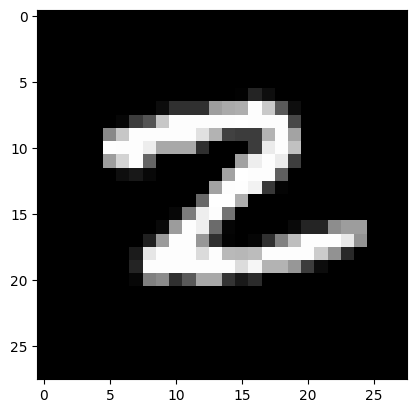

2


In [3]:
print(x_train_org.shape)
print(y_train_org.shape)

plt.imshow(x_train_org[143], cmap="gray")
plt.show()
print(y_train_org[143])

In [17]:
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
y_train = y_train_org.reshape(y_train_org.shape[0], -1)

x_test = x_test_org.reshape(x_test_org.shape[0], -1)
y_test = y_test_org.reshape(y_test_org.shape[0], -1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [18]:
x_train = x_train.astype('float32') / 255
y_train = y_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255
y_test = y_test.astype('float32') / 255

In [19]:
CLASS_COUNT = 10

In [20]:
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

y_train.shape

(60000, 10)

In [21]:
model = Sequential()

model.add(Dense(1000, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(CLASS_COUNT, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(x_test, y_test))

Epoch 1/15
469/469 [==============================] - 4s 5ms/step - loss: 0.2012 - accuracy: 0.9379 - val_loss: 0.1140 - val_accuracy: 0.9651
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0879 - accuracy: 0.9729 - val_loss: 0.0959 - val_accuracy: 0.9707
Epoch 3/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0616 - accuracy: 0.9812 - val_loss: 0.0779 - val_accuracy: 0.9755
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0453 - accuracy: 0.9856 - val_loss: 0.0710 - val_accuracy: 0.9794
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0377 - accuracy: 0.9880 - val_loss: 0.0821 - val_accuracy: 0.9767
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0850 - val_accuracy: 0.9797
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 0.0773 - val_accuracy: 0.9811
Epoch 

In [23]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0121 - accuracy: 0.9964


[0.01207792665809393, 0.9963833093643188]

1


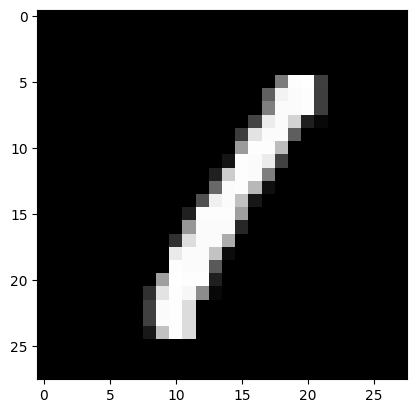

In [11]:
from random import randint


n = randint(1, 100)

plt.imshow(x_train_org[n], cmap="gray")
plt.show
print(y_train_org[n])

In [24]:
model.predict(x_train[:1])

1/1 [==============================] - 0s 57ms/step


array([[1.3441093e-13, 3.5150584e-17, 8.7216547e-16, 9.0262219e-08,
        2.6780071e-15, 9.9999988e-01, 6.6792134e-11, 1.0627746e-14,
        1.6673638e-11, 8.3989812e-12]], dtype=float32)

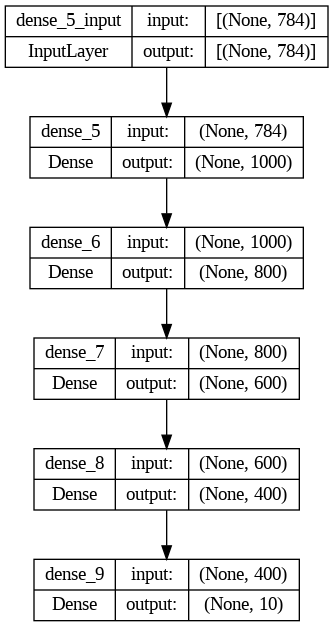

In [25]:
utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)